# Latar Belakang
Sebuah perusahaan yang bergerak di bidang retail ingin menggunakan data transaksi pelanggan yang telah berbelanja di perusahaan tersebut untuk melihat karakteristik pelanggan terhadap penjualan serta membuat keputusan untuk meningkatkan keuntungan.


## Pernyataan Masalah
Adapun pertanyaan yang perlu dijawab melalui analisis data diantaranya adalah :
1. Bagaimana karakteristik dari pelanggan yang telah berbelanja secara umum.
2. Bagaimana karakteristik pelanggan terkait program promosi yang terakhir dibuat.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data transaksi pelanggan yang sudah dikumpulkan oleh perusahaan.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import spearmanr, normaltest
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait transaksi pelanggan selama berbelanja. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:  

People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut 5 baris teratas dan terbawah dari dataset Supermarket Customers.

In [2]:
df=pd.read_csv('Supermarket Customers.csv', sep='\t')
display(df.head(5),df.tail(5))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Selanjutnya adalah kita perlu masuk kedalam tahapan *data cleaning* karena pada umumnya data yang didapat masih belum dapat digunakan untuk analisis secara langsung sehingga perlu dilakukan *cleansing* terlebih dahulu. Adapun faktor-faktor yang perlu diketahui dan ditangani terkait *data cleaning* diantaranya yaitu :

* Data duplikat, data kosong dan data Outlier/anomali
* Tipe data yang tidak sesuai

Setiap penanganan kasus-kasus pada poin diatas akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Selanjutnya, mari kita lihat informasi dari dataset `Supermarket Customers`.

In [105]:
print(f'Jumlah baris di dataset adalah : {df.shape[0]}\nJumlah kolom di dataset df adalah : {df.shape[1]}\n')
df.info()

Jumlah baris di dataset adalah : 2240
Jumlah kolom di dataset df adalah : 29

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldPro

In [106]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [107]:
pd.set_option('display.max_colwidth', 300)
# menampilkan data unik di tiap kolom
listData = []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Sampel Data Unik'],
                     data=listData)
tabel1Desc

,Nama Kolom,Jumlah Data Unik,Sampel Data Unik
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 65..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61,..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 447, 712, 452, 523, 546, 398, 10, 688, 247, 856, 496, 25, 258, 565, 2, 721, 1..."


Secara umum, dapat dilihat bahwa :

* dataset `Supermarket Customers` memiliki 29 kolom dan 2240 baris.
* kolom `ID` berisikan id unik untuk tiap pelanggan, sehingga tidak relevan dalam analisis dan bisa dihapus.
* kolom `Z_CostContact` dan `Z_Revenue` dimana masing-masing kolom berisikan data yang sama pada setiap barisnya sehingga tidak dapat digunakan dalam analisis dan bisa dihapus.
* kolom `Income` memiliki data kosong sejumlah 24 baris data yang diwakili dengan data NaN.
* kolom `Education` berisikan data `2n Cycle` yang tidak sesuai dengan standar pendidikan secara umum.
* kolom `Marital_Status` berisikan data `Together`, `Absurd`, `Alone` dan `YOLO` yang tidak sesuai dengan standar pernikahan secara umum.
* kolom `Dt_Customer` yang tipe datanya masih object maka akan diubah menjadi datetime untuk memudahkan dalam analisis.
* perlu juga dilakukan pengecekan data outlier pada tipe data numerikal seperti pada kolom income dan kolom umur.

### Hapus Kolom


#### Kolom `ID`, `Z_CostContact` dan `Z_Revenue`

Kolom `ID`, `Z_CostContact` dan `Z_Revenue` dapat dihapus karena tidak digunakan dalam proses analisis. Setelah itu dapat dilakukan pengecekan duplikasi apabila kolom `ID` telah dihilangkan karena bila ditemukan data duplikat pada semua kolom kecuali kolom `ID` dapat disimpulkan data tersebut duplikat.

In [3]:
df.drop(['ID','Z_CostContact','Z_Revenue'] ,axis=1, inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


### Duplikat


dapat dilihat ditemukan sejumlah data yang duplikat setelah menghapus kolom ID. Karena semua datanya sama di semua kolom maka dapat disimpulkan data tersebut adalah duplikat dan akan dihapus.

In [4]:
# menampilkan jumlah data duplikat
df.duplicated().sum()

182

In [5]:
# menampilkan contoh data duplikat
df[df.duplicated(keep=False)].sort_values(by='Income').head(6)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
30,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,0
1138,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,0
1203,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,1
260,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,1
558,1970,2n Cycle,Married,15315.0,0,0,03-08-2013,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,0
1107,1970,2n Cycle,Married,15315.0,0,0,03-08-2013,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,0


In [6]:
# data duplikat akan dihapus
df.drop_duplicates(inplace=True)

# sudah tidak ada lagi data yang duplikat
df.duplicated().sum()

0

### Missing Value


Ada 2 cara untuk menangani *missing value*:
* Pertama, mengisi data yang hilang dengan nilai sebenarnya atau sedekat mungkin dengan nilai asli menggunakan pendekatan lain.
* Kedua, menghapus data yang hilang apabila jumlah data yang hilang relatif sedikit/kecil.

mari kita lihat persebaran data hilang pada dataset yang digunakan.

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.166181
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

#### Kolom `Income`

Karena missing value pada kolom income hanya 1.16% maka bisa langsung dilakukan penghapusan missing value kolom income.

In [8]:
df.dropna(subset=['Income'],inplace=True)

# missing value di kolom income sudah tidak ada
df['Income'].isna().sum()

0

### Anomaly Value / Outlier


#### Kolom `Income`

Pengecekan data outlier pada kolom `Income` menggunakan visualisasi box plot dan mengetahui valuenya menggunakan metode IQR

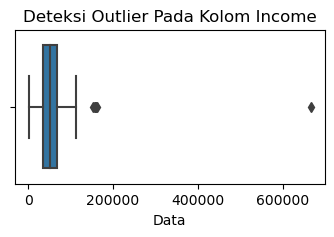

In [9]:
plt.figure(figsize=(4, 2))
sns.boxplot(x='Income', data=df)
plt.title('Deteksi Outlier Pada Kolom Income')
plt.xlabel('Data')
plt.show()

In [10]:
# metode IQR untuk mengetahui value dari data outlier pada kolom income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
BB = Q1 - (1.5*IQR)
BA = Q3 + (1.5*IQR)

outlier_unik = df[(df['Income']<BB) | (df['Income']>BA)]['Income'].unique()
outlier_jumlah = df[(df['Income']<BB) | (df['Income']>BA)]['Income'].nunique() 

print(f'data outlier pada kolom income berjumlah : {outlier_jumlah}\nyaitu :{outlier_unik}')

data outlier pada kolom income berjumlah : 8
yaitu :[157243. 162397. 153924. 160803. 157733. 157146. 156924. 666666.]


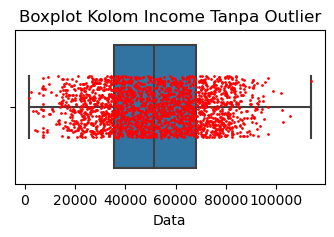

In [11]:
# karena data outlier berjumlah sedikit maka kita dapat menghapus data outlier pada kolom income
income_outlier = df[ (df['Income']<BB) | (df['Income']>BA) ].index
df.drop(income_outlier , inplace=True)

# melakukan pengecekan kembali terhadap keberadaan outlier di kolom income menggunakan boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x='Income', data=df)
sns.stripplot(x='Income', data=df, color='red', jitter=0.2, size=2)
plt.title('Boxplot Kolom Income Tanpa Outlier')
plt.xlabel('Data')
plt.show()

# outlier sudah terhapus dan tidak ditemukan kembali pada kolom income

#### Kolom `Marital_Status`

Ditemukan data anomali yaitu `Together`, `Absurd`, `Alone` dan `YOLO` dan kita dapat melihat apakah ada hubungan antara data pada kolom `Marital_Status` dengan kolom lain seperti `Kidhome` dan `Teenhome` menggunakan cross tabulation.

In [12]:
display(df['Marital_Status'].value_counts(),
        pd.crosstab(df['Marital_Status'],df['Teenhome']),pd.crosstab(df['Marital_Status'],df['Kidhome']))

Marital_Status
Married     785
Together    510
Single      439
Divorced    215
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Teenhome,0,1,2
Marital_Status,,,
Absurd,2,0,0
Alone,1,2,0
Divorced,91,118,6
Married,397,367,21
Single,271,159,9
Together,254,244,12
Widow,27,42,1
YOLO,0,2,0


Kidhome,0,1,2
Marital_Status,,,
Absurd,2,0,0
Alone,0,3,0
Divorced,129,82,4
Married,444,324,17
Single,248,182,9
Together,289,210,11
Widow,55,15,0
YOLO,2,0,0


Dapat dilihat pada cross tabulation untuk kolom `Marital_Status`, pada data berlabel `Single`,`Divorced`,`Married`,`Widow` hampir semuanya memiliki jumlah anak/tanggungan pada kolom `Kidhome` dan `Teenhome` serta memiliki persebaran yang cukup acak sehingga tidak dapat melakukan perbaikan/perubahan data untuk data `Absurd`, `Alone` dan `YOLO`. Karena jumlah data anomali yang berisikan `Absurd`, `Alone` dan `YOLO` sangat sedikit dibandingkan total data maka data anomali tersebut dapat dihapus. 

Selanjutnya untuk data anomali `Together` karena jumlahnya cukup banyak maka tidak akan dihapus.

In [13]:
# hapus data Absurd, Alone dan YOLO pada kolom Marital_Status
marital_stat = df[ (df['Marital_Status']=='Absurd')|(df['Marital_Status']=='Alone')|(df['Marital_Status']=='YOLO') ].index
df.drop(marital_stat , inplace=True)

df['Marital_Status'].value_counts()/df.shape[0]*100

# presentasi data pada kolom Marital_Status, data anomali yang berisikan Absurd, Alone dan YOLO sudah tidak ada

Marital_Status
Married     38.880634
Together    25.260030
Single      21.743437
Divorced    10.648836
Widow        3.467063
Name: count, dtype: float64

#### Kolom `Education`

Ditemukan data anomali pada kolom `Education` berisikan value `2n Cycle` sebanyak 185 baris data dengan presentasi sebesar 9.1%. Karena tidak diketahui definisi dari `2n Cycle` dan karena jumlah data `2n Cycle` cukup banyak maka tidak akan dihapus.

In [14]:
df['Education'].value_counts()/df.shape[0]*100

Education
Graduation    50.222883
PhD           21.693908
Master        16.493314
2n Cycle       9.162952
Basic          2.426944
Name: count, dtype: float64

#### Kolom `Year_Birth`

Perlu dilakukan pengecekan terhadap kolom `Year_Birth` apakah ada data yang anomali.

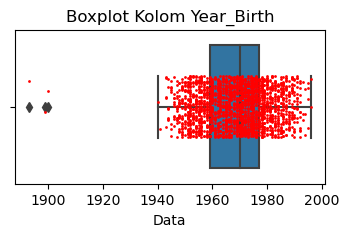

In [15]:
# cek outlier menggunakan boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x='Year_Birth', data=df)
sns.stripplot(x='Year_Birth', data=df, color='red', jitter=0.2, size=2)
plt.title('Boxplot Kolom Year_Birth')
plt.xlabel('Data')
plt.show()

In [16]:
# metode IQR untuk mengetahui value dari data outlier pada kolom Year_Birth
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
BB = Q1 - (1.5*IQR)
BA = Q3 + (1.5*IQR)

outlier_unik = df[(df['Year_Birth']<BB) | (df['Year_Birth']>BA)]['Year_Birth'].unique()
outlier_jumlah = df[(df['Year_Birth']<BB) | (df['Year_Birth']>BA)]['Year_Birth'].nunique() 

print(f'data outlier pada kolom Year_Birth berjumlah : {outlier_jumlah}\nyaitu :{outlier_unik}')

data outlier pada kolom Year_Birth berjumlah : 3
yaitu :[1900 1893 1899]


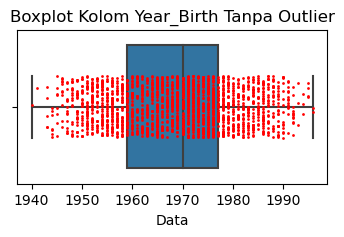

In [17]:
# karena data outlier berjumlah sedikit maka kita dapat menghapus data outlier pada kolom Year_Birth
income_outlier = df[ (df['Year_Birth']<BB) | (df['Year_Birth']>BA) ].index
df.drop(income_outlier , inplace=True)

# melakukan pengecekan kembali terhadap keberadaan outlier di kolom Year_Birth menggunakan boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x='Year_Birth', data=df)
sns.stripplot(x='Year_Birth', data=df, color='red', jitter=0.2, size=2)
plt.title('Boxplot Kolom Year_Birth Tanpa Outlier')
plt.xlabel('Data')
plt.show()

# outlier sudah terhapus dan tidak ditemukan kembali pada kolom income

### Standarisasi Tipe Data


#### Kolom `Dt_Customer`
Data tanggal pada kolom `Dt_Customer` berupa object dan perlu diubah menjadi datetime

In [18]:
# data unik pada kolom `Dt_Customer`
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '06-01-2013', '23-12-2012',
       '11-01-2014', '18-03-2013', '02-01-2013', '27-05-2013',
       '31-05-2013', '22-11-2013', '22-05-2014', '11-05-2013',
       '29-10-2012', '20-02-2013', '29-08-2013', '31-12-2013',
       '02-09-2013', '11-02-2014', '01-02-2013', '29-04-2013',
       '12-03-2013', '02-10-2013', '28-06-2014', '09-11-2012',
       '24-05-2013', '08-11-2012', '12-05-2014', '11-08-2012',
       '07-06-2014', '12-06-2013', '19-11-2012', '02-04-2013',
       '28-04-2014', '03-03-2014', '04-07-2013', '07-09-2012',
       '18-02-2013', '11-06-2013', '06-12-2013', '21-05-2013',
       '11-05-2014', '19-03-2014', '27-09-2013', '08-04-2013',
       '11-09-2012', '17-03-2013', '05-04-2013', '30-04

In [19]:
# mengubah data Dt_Customer dari tipe object menjadi tipe datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df[['Dt_Customer']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dt_Customer  2016 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 31.5 KB


In [20]:
# reset index untuk memperbaiki index setelah melalui tahap penghapusan data
df.reset_index(drop=True, inplace=True)

## Data Bersih
Data cleaning sudah dilakukan selanjutnya akan ditampilkan kembali data yang sudah bersih.

In [21]:
listDataClean = []
for col in df.columns :
    listDataClean.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listDataClean)

print(f'Jumlah baris di dataset adalah : {df.shape[0]}\nJumlah kolom di dataset df adalah : {df.shape[1]}\n')
dfDesc

Jumlah baris di dataset adalah : 2016
Jumlah kolom di dataset df adalah : 26



,dataFeatures,dataType,null,unique,uniqueSample
0,Year_Birth,int64,0,56,"[1971, 1980]"
1,Education,object,0,5,"[Graduation, Basic]"
2,Marital_Status,object,0,5,"[Divorced, Together]"
3,Income,float64,0,1961,"[65492.0, 94384.0]"
4,Kidhome,int64,0,3,"[1, 2]"
5,Teenhome,int64,0,3,"[1, 2]"
6,Dt_Customer,datetime64[ns],0,662,"[2014-05-22T00:00:00.000000000, 2013-12-12T00:..."
7,Recency,int64,0,100,"[11, 69]"
8,MntWines,int64,0,774,"[65, 41]"
9,MntFruits,int64,0,158,"[27, 122]"


Dapat dilihat pada informasi diatas setelah dilakukan pengecekan dan *cleansing* maka kita sudah mendapatkan data yang bersih dengan ciri-ciri : 
* Sudah tidak terdapat data missing value
* Sudah tidak terdapat data anomaly/outlier
* Sudah standarisasi tipe data sesuai kebutuhan analisis

Langkah selanjutnya kita dapat melanjutkan kedalam tahap data analisis.

# Data Analysis

## Cek distribusi data
Sebelum melakukan analisis ada baiknya melakukan pengecekan distribusi data untuk memudahkan analisis, salah satu caranya adalah melalui visualisasi. Dapat dilihat bahwa semua data memiliki distribusi tidak normal.

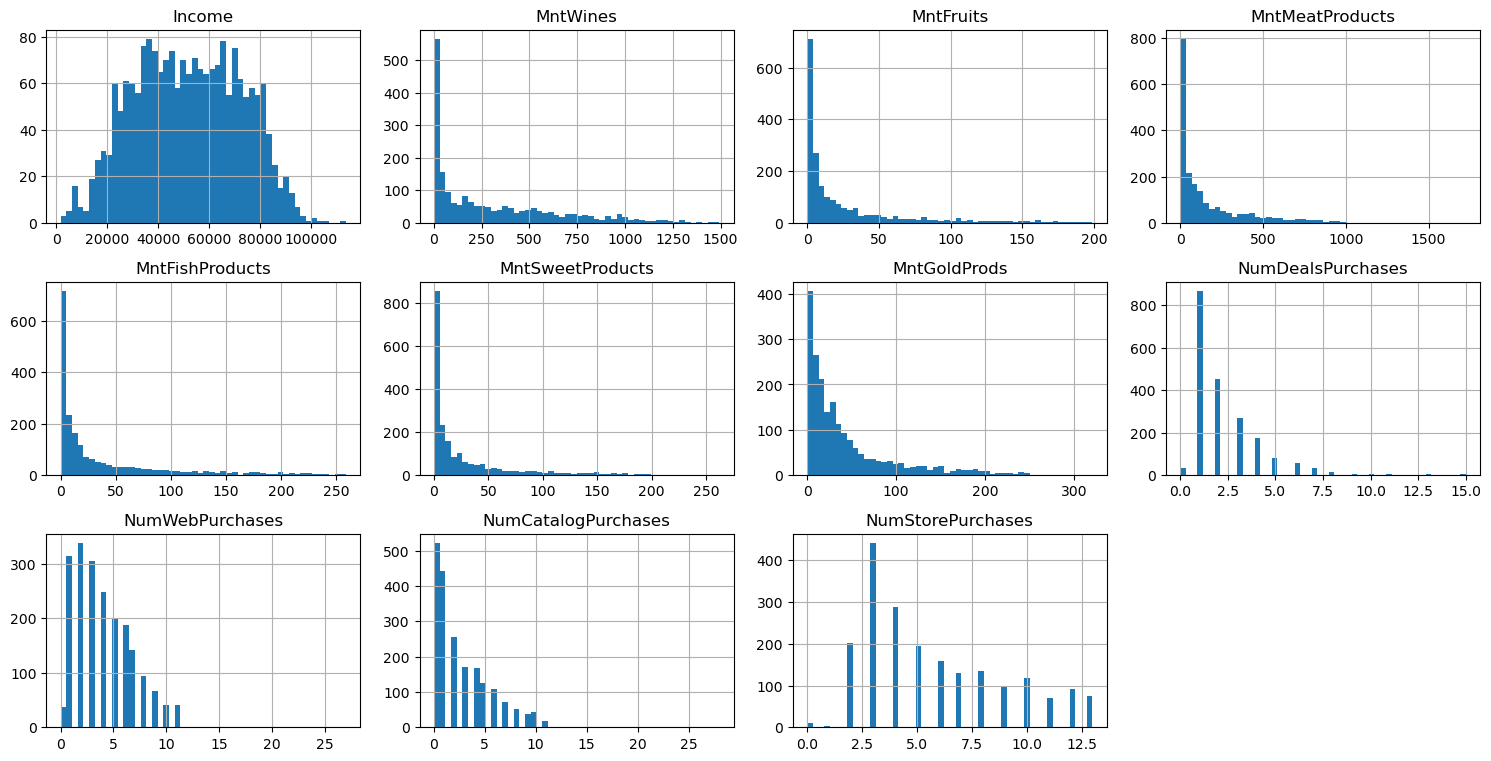

In [137]:
# membuat visualisasi pada kolom numerik
df_distribusi = df.select_dtypes(include=['float', 'int'])
df_distribusi.drop(columns=['Year_Birth','Kidhome','Teenhome','NumWebVisitsMonth','Recency','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'],inplace=True)
plot_distribusi = df_distribusi.columns

fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=plot_distribusi)
plt.tight_layout()
plt.show()

## Analisis berdasarkan usia
### Persebaran jumlah pelanggan berdasarkan usia
Pada bagian ini kita akan melihat bagaimana persebaran jumlah pelanggan berdasarkan usia.

In [23]:
# membuat kolom baru berisikan usia pelanggan dengan acuan tahun 2023
df['Usia_Pelanggan'] = 2023 - df['Year_Birth']
df['Usia_Pelanggan'].unique()

array([66, 69, 58, 39, 42, 56, 52, 38, 49, 73, 47, 64, 71, 36, 77, 43, 74,
       41, 44, 72, 54, 34, 60, 53, 50, 80, 48, 27, 55, 59, 46, 45, 68, 57,
       35, 75, 65, 51, 63, 40, 78, 32, 61, 70, 67, 31, 62, 37, 33, 76, 30,
       29, 82, 79, 28, 83], dtype=int64)

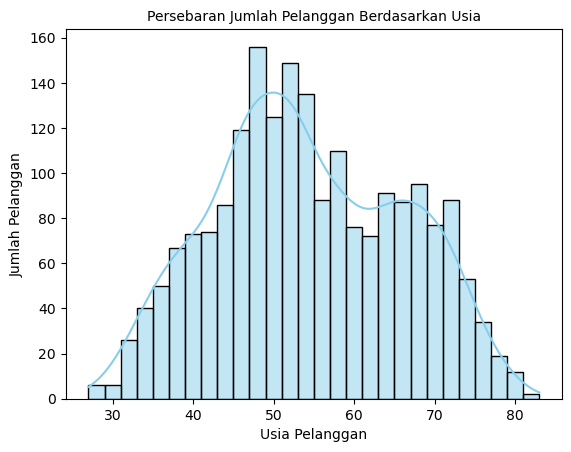

In [24]:
# membuat histogram terkait persebaran jumlah pelanggan berdasarkan usia
sns.histplot(df['Usia_Pelanggan'],bins=28,kde=True, color='skyblue')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.title('Persebaran Jumlah Pelanggan Berdasarkan Usia', size = 10)
plt.show()

Dapat dilihat usia pelanggan memiliki rentang usia 20 sampai dengan 90 tahun. Secara visualisasi pelanggan dengan rentang usia 40-60 memiliki jumlah yang lebih banyak ketimbang usia lainnya.

Dapat dilihat usia diatas 80 terlihat sangat sedikit, maka dari itu akan dicek jumlahnya dan apabila jumlahnya sangat sedikit makanya akan dihapus untuk memudahkan pembuatan rentang usia serta analisis kedepannya.

In [25]:
df[df['Usia_Pelanggan']>80]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Usia_Pelanggan
397,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,82
1776,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,83


In [26]:
# usia di atas 80 tahun hanya berjumlah 2 orang, karena data sangat sedikit maka akan dilakukan penghapusan
# untuk keperluan pembagian usia berdasarkan rentang (0-20, 21-40, 41-60, 61-80)
df.drop(df[df['Usia_Pelanggan'] > 80].index, inplace=True)

# cek data maksimum pada kolom usia setelah penghapusan
df['Usia_Pelanggan'].max()

80

#### Z-Test Single Population Proportion
Test ini untuk menguji apakah jumlah pelanggan dengan rentang usia 41-60 memiliki proporsi 50% dibandingkan dengan jumlah pelanggan dengan rentang usia lainnya. Sebelumnya kita akan membuat kolom baru berisikan rentang usia yang akan membagi usia menjadi beberapa kategori untuk memudahkan analisis lanjutan.

In [27]:
# membuat kolom baru berisikan rentang usia
def hitung_rentang_usia(usia_pelanggan):
    if usia_pelanggan >= 0 and usia_pelanggan <= 20:
        return '0-20'
    elif usia_pelanggan >= 21 and usia_pelanggan <= 40:
        return '21-40'
    elif usia_pelanggan >= 41 and usia_pelanggan <= 60:
        return '41-60'
    elif usia_pelanggan >= 61 and usia_pelanggan <= 80:
        return '61-80'
    else:
        return '>80'
    
df['Rentang_Usia'] = df['Usia_Pelanggan'].apply(hitung_rentang_usia)

**Hypotesis**  
**Ho** : proporsi usia 41-60 = 0.5  
**Ha** : proporsi usia 41-60 < 0.5

In [28]:
rentang_41_60 = np.sum(df['Rentang_Usia']=='41-60')
total = len(df['Rentang_Usia'])

# Z-Test Single Population Proportion
z_stat, p_value = proportions_ztest(rentang_41_60, total, 0.5, alternative = 'smaller')

print('P-value : ', p_value)
print('P-value/2 : ', p_value/2)

alpha = 0.05
if (p_value/2) < alpha:
    print("Ho ditolak: Maka proporsi usia 41-60 kurang dari 50%")
else:
    print("gagal menolak Ho: Maka proporsi usia 41-60 sekitar 50%.")

P-value :  0.9999996773075732
P-value/2 :  0.4999998386537866
gagal menolak Ho: Maka proporsi usia 41-60 sekitar 50%.


**Kesimpulan 1** : Jumlah pelanggan didominasi oleh pelanggan dengan rentang umur 41-60.

### Rentang usia vs rata-rata pendapatan
Pada bagian ini kita akan melihat bagaimana persebaran jumlah pelanggan berdasarkan rentang usia dan rata-rata pendapatan.

In [35]:
# membuat histogram terkait persebaran jumlah pelanggan berdasarkan usia dan rata-rata pendapatan
category_orders={'Rentang_Usia':["0-20","21-40","41-60","61-80"]}
fig = px.histogram(df, x="Rentang_Usia",y="Income",  histfunc='avg', category_orders=category_orders)
fig.update_layout(height=400, width=400)
fig.show()

**Kesimpulan 2** : 
- Jumlah pelanggan dengan pendapatan rata-rata tertinggi yaitu pada pelanggan dengan rentang usia 61-80.
- Jumlah pelanggan dengan rentang usia 41-60 yaitu pelanggan terbanyak justru menempati posisi ke 2 terkait rata-rata pendapatan.
- Tidak ada pelanggan dengan usia kurang dari 21 tahun.

### Rentang usia vs rata-rata pengeluaran belanja
Pada bagian ini kita akan melihat bagaimana persebaran jumlah pelanggan berdasarkan rentang usia dan rata-rata pengeluaran belanja (rata-rata total seluruh jenis produk).

In [34]:
Mnt_All_Total = [i for i in df.columns if 'Mnt' in str(i)]
df['Mnt_Total'] = df[Mnt_All_Total].sum(axis=1)

# membuat histogram terkait persebaran jumlah pelanggan berdasarkan usia dan rata-rata total pengeluaran belanja
category_orders={'Rentang_Usia':["21-40","41-60","61-80"]}
fig = px.histogram(df, x="Rentang_Usia",y="Mnt_Total",  histfunc='avg', category_orders=category_orders)
fig.update_layout(height=400, width=400)
fig.show()

**Kesimpulan 3** : 
- Jumlah pelanggan dengan rata-rata total pengeluaran belanja tertinggi yaitu pada pelanggan dengan rentang usia 61-80.
- Jumlah pelanggan dengan rentang usia 41-60 yaitu pelanggan terbanyak justru menempati posisi ke 3.

### Korelasi antara pendapatan dengan pengeluaran belanja

dapat dilihat pada kesimpulan 1,2 dan 3 bahwa jumlah pelanggan terbanyak yaitu pada rentang usia 41-60, namun bila dilihat dari rata-rata pendapatan dan rata-rata total pengeluaran belanja didominasi oleh pelanggan dengan rentang usia 61-80. Maka dari itu perlu dilihat apakah ada korelasi antara pendapatan dengan total pengeluaran belanja.

In [39]:
# membuat scatterplot untuk melihat hubungan antara pendapatan dengan total pengeluaran belanja
fig = go.Figure(data=go.Scatter(name='Pengamatan',x=df['Mnt_Total'], y=df['Income'],mode='markers'))
fig.update_traces(hovertemplate='Pengeluaran: %{x} <br>Pendapatan: %{y}')
fig.update_layout(width=500, height=400, xaxis_title='Total Pengeluaran Belanja', yaxis_title='Pendapatan')
fig.show()

Berdasarkan grafik di atas kita dapat mengetahui bahwa pelanggan yang memiliki pendapatan yang lebih tinggi cenderung memiliki total pengeluaran belanja yang lebih tinggi. Namun untuk dapat memastikan korelasinya kita dapat melakukan uji korelasi. Sebelum melakukan uji korelasi kita terlebih dahulu perlu melakukan uji normalitas untuk melihat bagaimana distribusi datanya.

In [42]:
# cek normalitas data menggunakan Uji Kolmogorov-Smirnov (kstest)
ks_income = normaltest(df['Income'])
ks_mnt = normaltest(df['Mnt_Total'])

print(ks_income)
print(ks_mnt)

NormaltestResult(statistic=189.64853920738042, pvalue=6.581773922309534e-42)
NormaltestResult(statistic=204.29218141521272, pvalue=4.3502724578413857e-45)


Karena P-value lebih kecil dari 0.05 maka kedua data bersifat distribusi tidak normal

#### Spearman's Correlation

In [43]:
# menghitung korelasi antar variable Income dan Mnt_Total dengan metode Spearman
corr, p_value = spearmanr(df['Income'], df['Mnt_Total'])

print(f"Spearman Rank Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Ada korelasi antar kedua variable.")
else:
    print("Tidak ada korelasi antar kedua variable.")

Spearman Rank Correlation Coefficient: 0.8577024424249774
P-value: 0.0
Ada korelasi antar kedua variable.


**Kesimpulan 4** : 
- Pada kesimpulan 1 kita mengetahui jumlah pelanggan didominasi oleh rentang usia 41-60 namun berdasarkan rata-rata pendapatan dan rata-rata total pengeluaran didominasi oleh rentang usia 61-80, setelah dilakukan uji korelasi antara pendapatan dengan total pengeluaran belanja memang ditemukan korelasi.
- Dapat dilihat pada hasil uji korelasi bahwa variabel pendapatan memiliki korelasi positif terhadap variabel total pengeluaran belanja yang berarti semakin tinggi pendapatan cenderung memiliki pengeluaran belanja yang semakin tinggi dan korelasinya cukup kuat.

### Rentang usia vs tipe pembelian
Pada bagian ini kita akan melihat bagaimana persebaran jumlah pelanggan berdasarkan rentang usia dan tipe pembelian yaitu apakah melalui web, store offlane atau catalog.

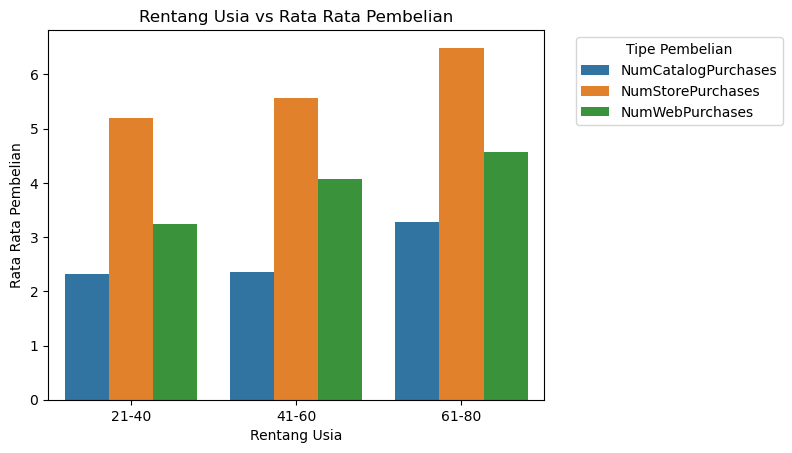

In [44]:
grouped_purchases = df.groupby('Rentang_Usia')[['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']].agg('mean').reset_index()

# melakukan transformasi data untuk kolom tertentu
melted_purchases = pd.melt(grouped_purchases, id_vars='Rentang_Usia', var_name='Tipe_Pembelian', value_name='Total_Pembelian')

# membuat grafik barplot
sns.barplot(x='Rentang_Usia', y='Total_Pembelian', hue='Tipe_Pembelian', data=melted_purchases)
plt.xlabel('Rentang Usia')
plt.ylabel('Rata Rata Pembelian')
plt.title('Rentang Usia vs Rata Rata Pembelian')
plt.legend(title='Tipe Pembelian', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Kesimpulan 5** :
- Dapat dilihat untuk semua tipe pembelian memiliki urutan yang sama di semua rentang umur (21-40, 41-60, 61-80) baik melalui catalog, store dan web yaitu urutan pertama adalah melalui store atau biasa disebut sebagai toko offlane.
- Rata rata pembelian juga didominasi oleh pelanggan dengan rentang umur 61-80

## Analisis berdasarkan Jumlah anak vs jumlah pembelian

Pada bagian ini kita akan melihat bagaimana persebaran jumlah pelanggan bagi yang memiliki tanggunan anak (0,1,2) terhadap rata-rata total pengeluaran belanja.

In [50]:
# membuat kolom baru untuk jumlah anak dari kategori kidhome dan teenhome
df['Bukan_Dewasa'] = df['Kidhome'] + df['Teenhome']
df['Bukan_Dewasa'] = df['Bukan_Dewasa'].astype(str)

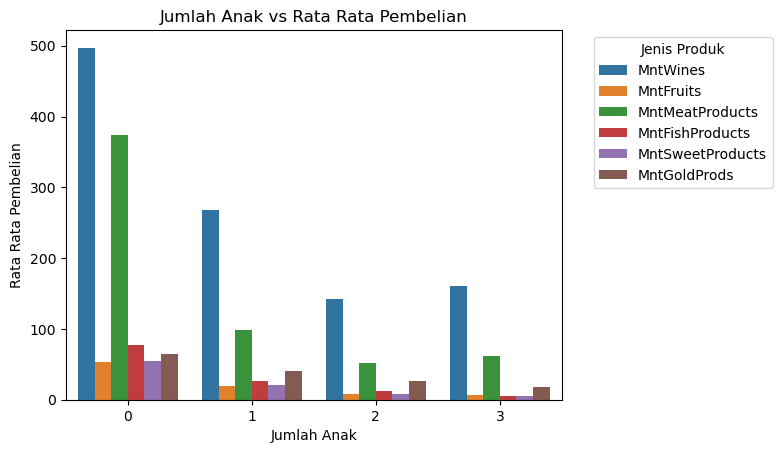

In [51]:
grouped_Mnt = df.groupby('Bukan_Dewasa')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].agg('mean').reset_index()

# melakukan transformasi data untuk kolom tertentu
melted_Mnt = pd.melt(grouped_Mnt, id_vars='Bukan_Dewasa', var_name='Jenis_Produk', value_name='Rerata_Pembelian')

# membuat barplot
sns.barplot(x='Bukan_Dewasa', y='Rerata_Pembelian', hue='Jenis_Produk', data=melted_Mnt)
plt.xlabel('Jumlah Anak')
plt.ylabel('Rata Rata Pembelian')
plt.title('Jumlah Anak vs Rata Rata Pembelian')
plt.legend(title='Jenis Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Kesimpulan 6** :
- Dapat dilihat untuk semua jenis produk didominasi oleh pelanggan yang tidak memiliki tanggungan/anak/bukan orang dewasa.
- Dapat dilihat bahwa produk tertinggi yang terjual yaitu wine dan kedua adalah produk daging. 

## Analisis berdasarkan kampanye promosi
Sebelumnya kita telah melakukan analisis secara umum. Selanjutnya kita akan melakukan analisis berdasarkan keberhasilan kampanye promosi dimana dalam hal ini adalah kampanye promosi terakhir.

### Kolom Education, Marital, Kidhome, Teenhome, Usia

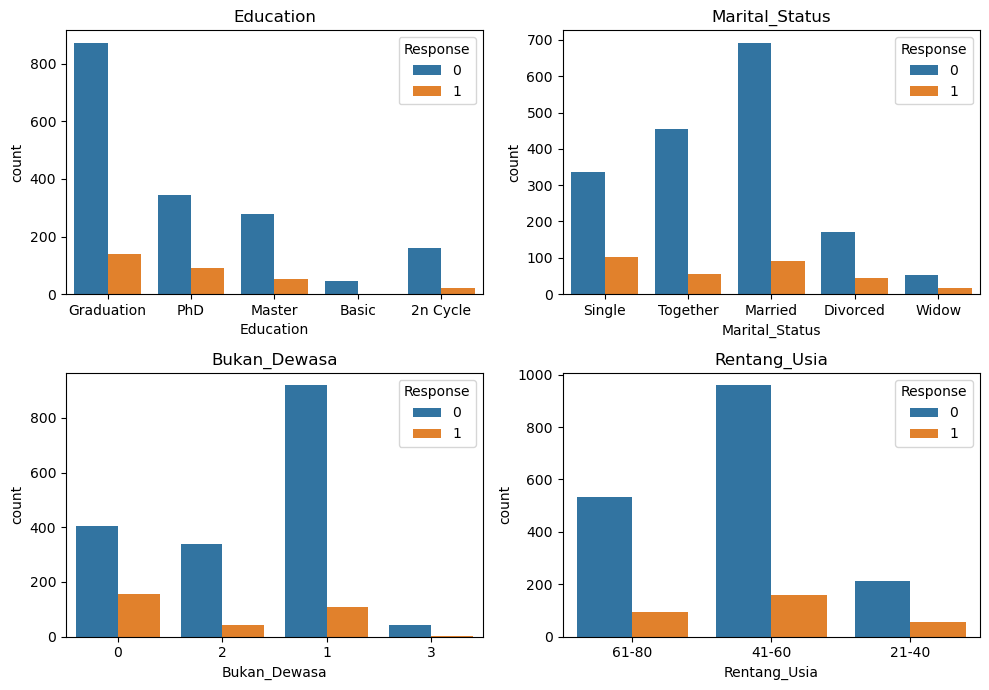

In [64]:
# membuat visualisasi terkait keberhasilan kampanye promosi terakhir
df_new = df.copy()
# menyimpan kolom education, marital status, bukan dewasa, rentang usia dalam variabel kolom_plot
kolom_plot = df_new.columns[[1,2, -1,-3]] 

# visualisasi berdasarkan jumlah (bukan rata-rata)
fig, axes = plt.subplots(2, 2, figsize=(10, 7))  
axes = axes.flatten()
for i, fitur in enumerate(kolom_plot):
    sns.countplot(data=df_new, x=fitur, hue='Response', ax=axes[i])
    axes[i].set_title(fitur)  
plt.tight_layout()
plt.show()

In [173]:
# melihat persentase persebaran pada tiap-tiap kolom/variabel terhadap kampanye terakhir (ya/tidak)
display(pd.crosstab(df['Education'],df['Response'], normalize='index') * 100,
       pd.crosstab(df['Marital_Status'],df['Response'], normalize='index') * 100,
       pd.crosstab(df['Bukan_Dewasa'],df['Response'], normalize='index') * 100,
       pd.crosstab(df['Rentang_Usia'],df['Response'], normalize='index') * 100)

Response,0,1
Education,,
2n Cycle,87.978142,12.021858
Basic,95.918367,4.081633
Graduation,86.094675,13.905325
Master,84.084084,15.915916
PhD,79.080460,20.919540


Response,0,1
Marital_Status,,
Divorced,79.906542,20.093458
Married,88.265306,11.734694
Single,76.887872,23.112128
Together,89.194499,10.805501
Widow,74.285714,25.714286


Response,0,1
Bukan_Dewasa,,
0,72.113677,27.886323
1,89.571150,10.428850
2,88.684211,11.315789
3,95.555556,4.444444


Response,0,1
Rentang_Usia,,
21-40,79.104478,20.895522
41-60,85.778175,14.221825
61-80,85.031847,14.968153


**Kesimpulan 7**
1. Tingkat Pendidikan terbanyak yaitu `Graduation` namun secara rasio `PhD` cenderung lebih menerima promosi terakhir.
2. Status Perkawinan terbanyak yaitu `Married` namun secara rasio `Widow`cenderung lebih menerima promosi terakhir.
3. Pelanggan terbanyak yaitu yang memiliki tanggunan 1 anak namun secara rasio pelanggan yang tidak memiliki tanggungan yang cenderung lebih menerima promosi terakhir.
4. Rentang Usia terbanyak yaitu usia 41-60 namun secara rasio rentang usia 21-40 yang cenderung lebih menerima promosi terakhir.

# Kesimpulan dan Rekomendasi 

**Kesimpulan**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan berikut :

Secara umum :
- Jumlah pelanggan didominasi oleh pelanggan dengan rentang usia 41-60. 
- Jumlah pelanggan dengan rata-rata pendapatan tertinggi yaitu pada pelanggan dengan rentang usia 61-80 sedangkan rentang usia 41-60 berada di posisi ke 2.
- Tidak ada pelanggan dengan usia kurang dari 21 tahun.
- Jumlah pelanggan dengan rata-rata total pengeluaran belanja tertinggi yaitu pada pelanggan dengan rentang usia 61-80 sedangkan rentang usia 41-60 berada di posisi ke 3.
- Terdapat korelasi yang cukup kuat antara pendapatan dengan total belanja dan bersifat positif.
- Tipe pembelian paling banyak yaitu melalui toko/store di urutan ke-1, diikuti tipe pembelian melalui web dan terakhir catalog. Semua tipe pembelian memiliki urutan yang sama di berbagai rentang usia
- Berdasarkan jumlah tanggungan dan rata-rata total pengeluaran belanja, Semua jenis produk didominasi oleh pelanggan yang tidak memiliki tanggungan/anak. Produk tertinggi yang terjual yaitu wine dan kedua adalah produk daging. 

Berdasarkan kampanye promosi :
- Pelanggan dengan tingkat Pendidikan terbanyak yaitu `Graduation` namun secara rasio `PhD` cenderung lebih menerima promosi terakhir.
- Pelanggan dengan status Perkawinan terbanyak yaitu `Married` namun secara rasio `Widow`cenderung lebih menerima promosi terakhir.
- Pelanggan dengan tanggunan anak terbanyak yaitu yang memiliki 1 tanggungan namun secara rasio pelanggan yang tidak memiliki tanggungan yang cenderung lebih menerima promosi terakhir.
- Pelanggan terbanyak yaitu dengan rentang usia 41-60 tahun namun secara rasio pelanggan dengan rentang usia 21-40 tahun cenderung lebih menerima promosi terakhir.

**Rekomendasi**

- Dapat difokuskan kepada pelanggan yang berusia 41-60 tahun karena memiliki persebaran jumlah terbanyak sedangkan rata-rata pengeluaran belanjanya hanya berada diurutan ke 2 setelah pelanggan berusia 61-80. Caranya dengan memberikan diskon untuk produk-produk yang dijual untuk meningkatkan daya beli.
- Perlu dibuatkan promosi untuk calon pelanggan yang akan berbelanja melalui web karena tipe belanja melalui web berada di urutan ke 2 setelah tipe belanja melalui toko. Selain itu, tipe belanja melalui web akan dapat mengurangi cost operational seperti biaya sewa gedung/tenant dan sewa pegawai.
- Dapat difokuskan untuk pemberian diskon pada produk konsumsi harian selain daging yaitu berupa ikan, buah dan makanan manis. Karena produk wines dan gold bukanlah produk konsumsi harian.
- Promosi dapat dibuat untuk pelanggan dengan kriteria lebih spesifik yaitu yang memiliki tingkat edukasi tidak terlalu tinggi, sudah menikah dan setidaknya memiliki tanggungan anak.

# Export Final Data Frame

In [174]:
df.to_csv('Supermarket_Customers_Clean.csv', index=False)